In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import OneClassSVM

In [2]:
from sklearn.preprocessing import LabelEncoder
#Read and add target column
df = pd.read_csv('df_6dB_pump_fe_ta_imb.csv')

In [3]:
#df = df[['mfccs0', 'delta_mfccs4', 'delta2_mfccs6', 'target' ]]

In [4]:
#df.drop(df.iloc[:, 4:-1], axis=1, inplace = True)

In [5]:

#df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.drop(df.iloc[:, -27:-1], axis=1, inplace = True)

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
df.head()

,mfccs0,mfccs1,mfccs2,mfccs3,mfccs4,mfccs5,mfccs6,mfccs7,mfccs8,mfccs9,mfccs10,mfccs11,mfccs12,target
0,-405.86188,152.76860,-74.52950,62.734150,-44.739450,47.361115,-23.117369,27.913315,-14.657843,5.387503,-1.358829,-3.800514,10.668890,1
1,-405.69257,151.58089,-74.30310,61.144775,-43.903812,44.871080,-22.432236,26.454416,-13.038487,8.177551,-0.561013,-6.047754,9.784236,1
2,-398.59280,145.81995,-81.03869,56.707012,-49.122260,36.722343,-30.608640,22.128532,-14.495670,5.461157,-2.164203,-7.009260,7.983214,1
3,-404.55270,152.83186,-72.84279,66.303690,-42.953503,45.730520,-26.300179,27.969782,-13.734242,6.439921,-1.166000,-4.973391,10.346660,1
4,-409.14900,151.14287,-76.30834,59.437164,-50.093975,40.913765,-27.727530,26.517015,-15.732157,4.814447,-4.608692,-6.492398,10.583862,1


In [9]:
df.target.value_counts()

1    3749
0     456
Name: target, dtype: int64

In [10]:
# label encode target
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])

In [11]:
df.target.value_counts()

1    3749
0     456
Name: target, dtype: int64

target     1.000000
mfccs4     0.179245
mfccs8     0.177236
mfccs11    0.127543
mfccs5     0.126474
mfccs2     0.120912
mfccs3     0.106872
mfccs7     0.088154
mfccs12    0.044737
mfccs1     0.039638
mfccs6     0.017535
mfccs9     0.010911
mfccs10   -0.084775
mfccs0    -0.370577
Name: target, dtype: float64

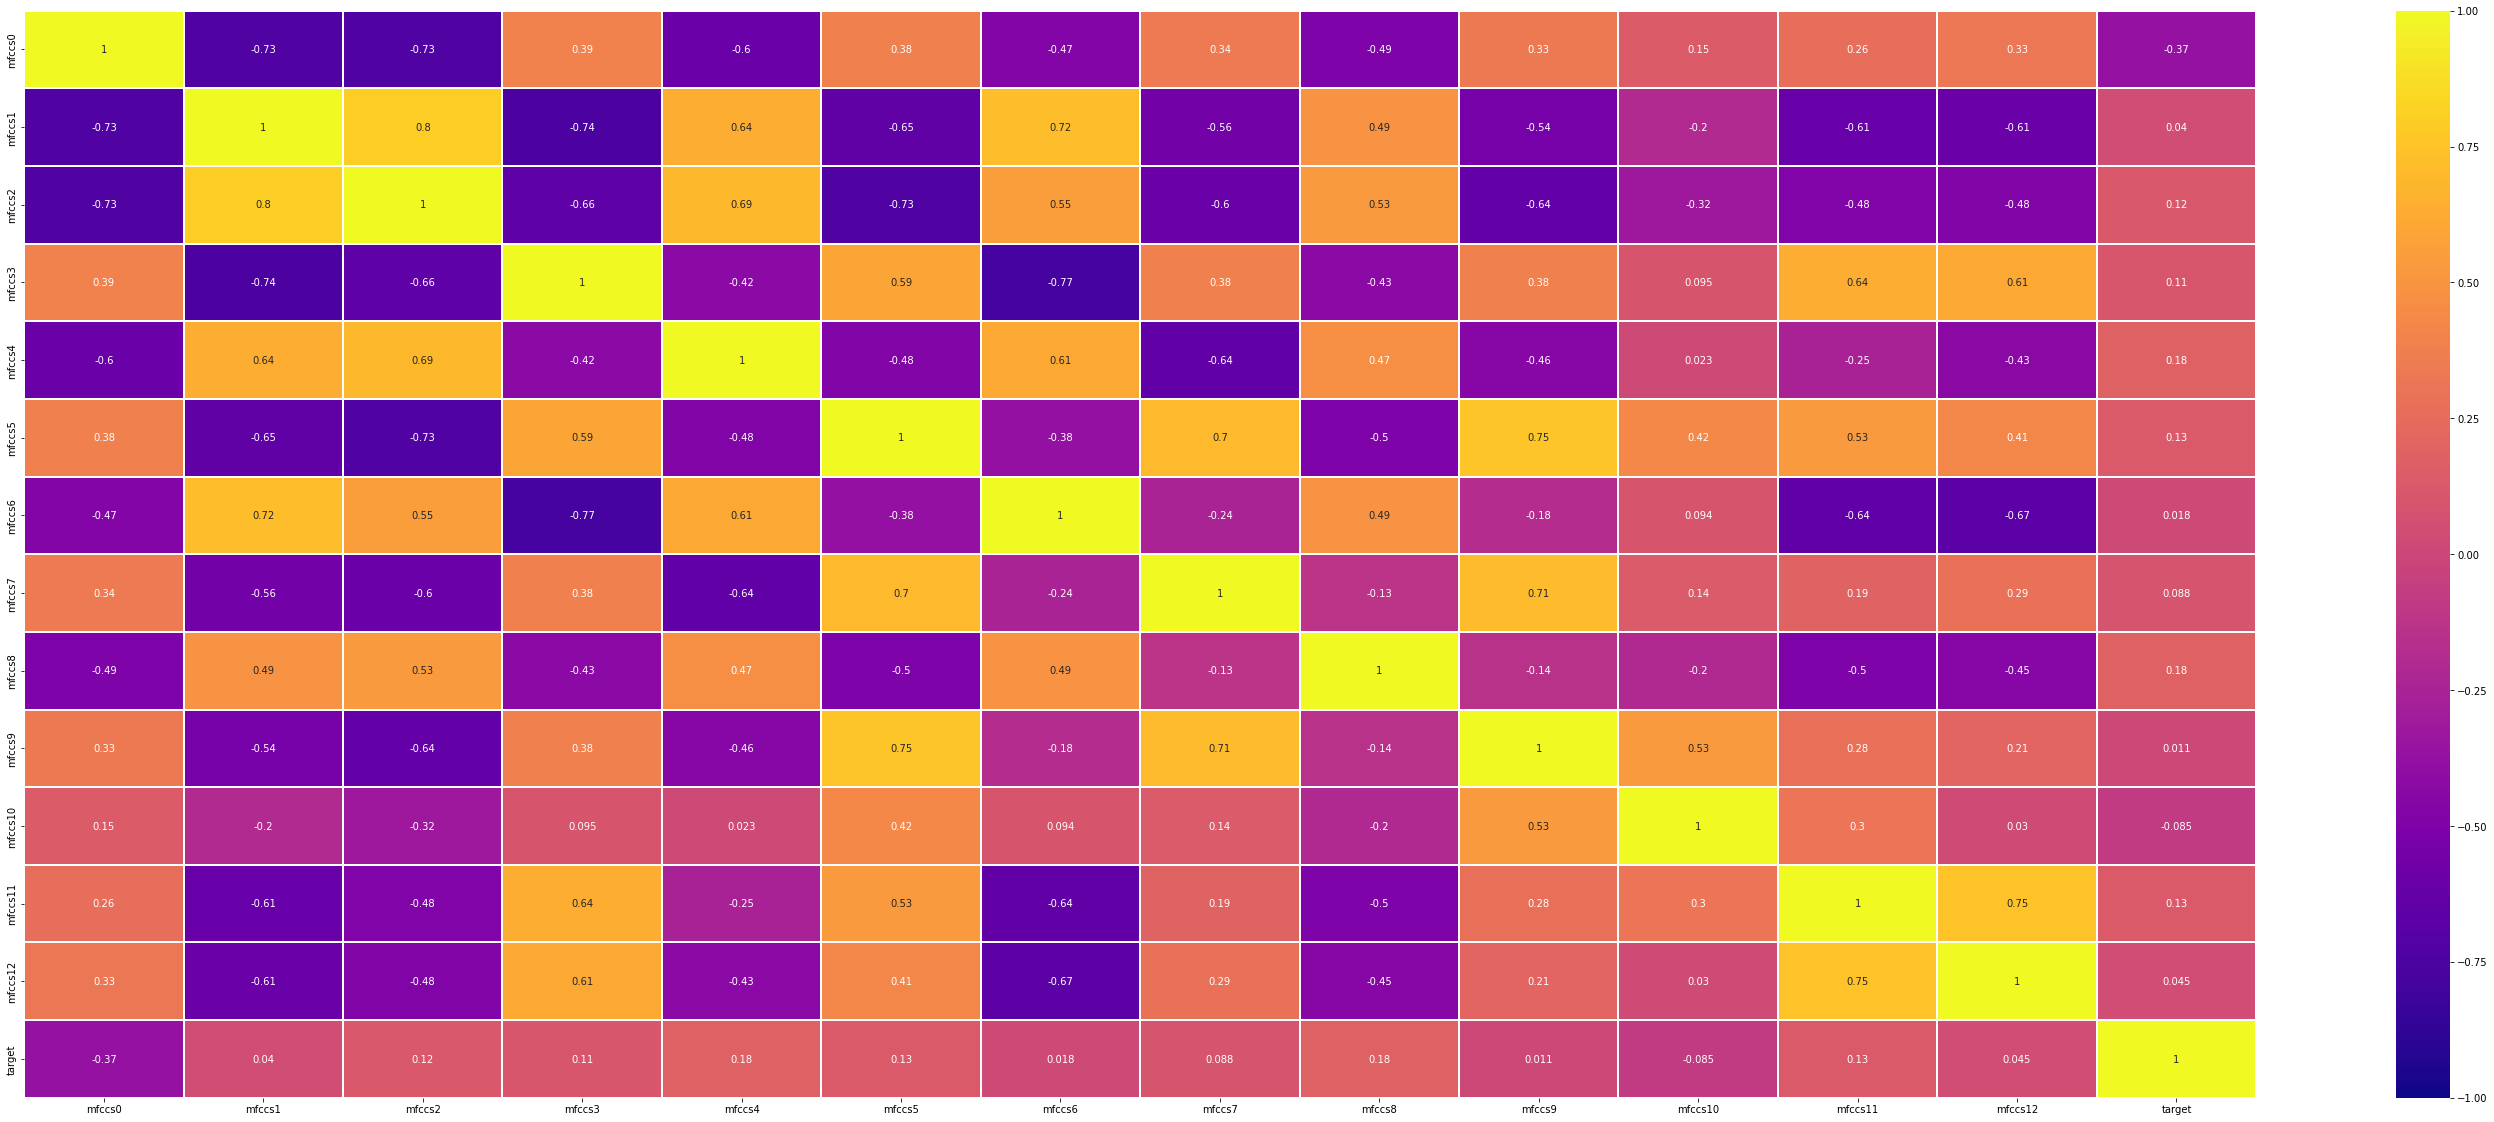

In [12]:
#EDA
correlation = df.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(correlation, annot=True, linewidths=0.1, vmin=-1, cmap="plasma")
correlation['target'].sort_values(ascending=False)
#Feature engineeing delta and delta2

In [13]:
X = df.drop(['target'],axis=1)
# X = df['features']
y = df.target

#Normalise X
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.590240,0.439919,0.239171,0.479588,0.420601,0.657463,0.563327,0.636383,0.442300,0.523835,0.454309,0.435699,0.470168
1,0.590954,0.430437,0.241296,0.460700,0.433911,0.617783,0.574976,0.600789,0.485983,0.601702,0.481520,0.378586,0.445067
2,0.620881,0.384444,0.178073,0.407964,0.350788,0.487929,0.435949,0.495248,0.446675,0.525891,0.426840,0.354149,0.393966
3,0.595759,0.440424,0.255003,0.522007,0.449049,0.631479,0.509208,0.637761,0.467215,0.553207,0.460885,0.405890,0.461025
4,0.576384,0.426940,0.222474,0.440408,0.335310,0.554722,0.484938,0.602317,0.413320,0.507842,0.343466,0.367285,0.467756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,0.256371,0.770522,0.659359,0.086312,0.434554,0.397446,0.623139,0.194805,0.400032,0.662318,0.784314,0.428425,0.384366
4201,0.278723,0.814042,0.547946,0.085888,0.380989,0.513751,0.506033,0.378142,0.418548,0.530062,0.606843,0.538700,0.446317
4202,0.233218,0.941814,0.491503,0.189266,0.631695,0.348592,0.726326,0.144317,0.553635,0.440147,0.700466,0.355123,0.255842
4203,0.242016,0.930737,0.477978,0.205850,0.601953,0.397813,0.706635,0.153223,0.535892,0.465047,0.720263,0.382375,0.320055


In [14]:
#split training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

#models
rfc = RandomForestClassifier(n_estimators= 50, class_weight='balanced')
lr = LogisticRegression(solver='lbfgs', class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=3)
clf = svm.SVC(class_weight='balanced')
clf_1 = OneClassSVM(gamma='auto')
model = clf

#Train the model
model.fit(X_train,y_train)

SVC(class_weight='balanced')

In [15]:
from numpy import sqrt
from numpy import argmax

'''Reference https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/'''

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))



# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [ ]:
#Predict
y_pred = model.predict(X_test)

#accuracy
print(model.score(X_test, y_test))
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)



In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_train))

In [ ]:
#feature importance

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

rfc_importances = pd.Series(importances)#, index=feature_names)

fig, ax = plt.subplots()
rfc_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()